## Siyu Yang CPA01
- The dataset was retrieved from OECD. 
- This dataset contains the labor force participation rate of both men and women(in % of female population ages 15-64) in each country from year 2010 - 2020. 
- The original URL: https://data.oecd.org/emp/labour-force-participation-rate.htm with the available csv file download option.
<br>
- The two main questions to answer and analyze are:
    1. Does Covid has an effect on women's labor force participation rate? on men's ?(and possible reasons)
    2. What is the average growth rate of each years's LFPR in the world, what is the general trend in the past 10 years ?


In [48]:
# pylint: disable=missing-module-docstring
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#first we import the required packages panda and numpy


### 1. First, we read the data and skim through it
At the first glance, there are total of 89868 of data, including each country's male LFPR, female LFPR and LFPR of all persons in different time range from 2010 to 2020.
There are also 89863 of labor force participation rate value with the minimum of 0 and maximum 0f 98.02. The existence of 0.00000 is likely that the corrsponding data is missing from the dataset, so we will remove the rows of data has Value = 0.0000000 for a more accurate analysis. 

In [49]:
df = pd.read_csv('LFS_SEXAGE.csv')# read the data

df =df[df['Value'] !=0] #clean missing data rows 
df.describe() #a quick look at the data


,AGE,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,87807.000000,87807.000000,87807.000000,87807.0,0.0,0.0,87807.000000,0.0,0.0
mean,43453.355758,2015.004043,2015.004043,0.0,NaN,NaN,43.035021,NaN,NaN
std,183706.680678,3.159787,3.159787,0.0,NaN,NaN,34.251475,NaN,NaN
min,1519.000000,2010.000000,2010.000000,0.0,NaN,NaN,0.016031,NaN,NaN
25%,2534.000000,2012.000000,2012.000000,0.0,NaN,NaN,6.827240,NaN,NaN
50%,4044.000000,2015.000000,2015.000000,0.0,NaN,NaN,42.808499,NaN,NaN
75%,6064.000000,2018.000000,2018.000000,0.0,NaN,NaN,77.943267,NaN,NaN
max,900000.000000,2020.000000,2020.000000,0.0,NaN,NaN,98.021452,NaN,NaN


### 2. Then we create a pivot table to see some numbers of each country's female LFPR from 2010 - 2020;

In [51]:
df2=df[df['Sex']=='Women']
df2= df2[df2['SERIES']=='LFPR']#we are only looking at women's LFPR
column = 'Value'

df2 = pd.pivot_table(df2, values=column, index=["Time"], columns=["Country"])
df2

Country,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2010,60.914744,56.259215,48.755954,61.856805,43.720692,51.041449,43.531117,51.518927,64.787128,63.325996,...,49.377579,58.628873,50.768858,53.237701,53.133655,67.321344,60.008215,25.121987,57.945913,58.589195
2011,61.350390,56.709572,48.151543,61.932655,45.758278,52.030137,42.171617,51.839628,64.762980,63.206018,...,49.646593,57.867442,50.447675,52.602857,54.036626,67.696628,60.747529,26.388589,58.164385,58.168211
2012,61.431980,57.406524,50.450739,62.185215,46.219544,53.483347,47.426457,52.598697,64.635396,63.022528,...,50.213469,58.183693,51.026574,52.765794,54.823920,68.240504,61.147910,27.058879,58.689538,58.086190
2013,61.508540,57.832098,49.123253,62.546928,46.714521,53.440027,47.045946,53.608904,64.402383,63.082490,...,50.410800,58.005850,51.519599,52.563725,55.109097,68.779284,61.568241,28.166118,59.254250,55.665258
2014,61.628283,57.971499,49.623175,62.231457,47.466485,53.548175,46.706373,53.677060,63.932127,62.315256,...,50.999640,58.092698,51.731860,53.353460,55.193403,69.257163,62.420391,27.823231,59.655798,55.663043
2015,62.287836,58.132001,49.662394,62.306114,47.480536,54.354668,46.027465,54.229499,63.896673,63.928809,...,48.939952,58.431632,52.759872,53.464376,55.517591,69.663819,62.915219,29.091975,60.071932,55.539449
2016,62.731700,58.789825,49.558345,62.589568,47.791155,54.272534,42.678962,54.970004,64.920928,64.519984,...,49.188529,58.522405,53.538540,53.753575,55.750949,69.886033,63.608167,30.032072,60.237694,55.878043
2017,63.453280,58.907985,52.017840,63.058240,48.467941,54.043524,43.536215,55.627454,65.230940,65.775348,...,49.554535,59.494024,53.911990,55.846641,55.682439,70.344521,63.495352,31.192851,60.915199,56.380075
2018,64.314720,59.118331,50.805869,63.184186,49.026830,53.496360,46.025284,56.290109,65.399520,66.418049,...,49.940458,60.224763,53.742091,56.235946,55.673826,70.700641,63.988242,31.896538,61.184172,56.671021


### 3. Then we'll pick four examples and plot them to see a general trend among women's LFPR
 - We can see that about the year 2019 to 2020, there are a different change of slope of each curve, but the all of them experienced an decrease of the slope (or a slowed rate of growth) to some extend.

Text(0.5, 1.0, '% of US, Australia, Japan and France women Labor Force Participation rate in year 2010 - 2020')

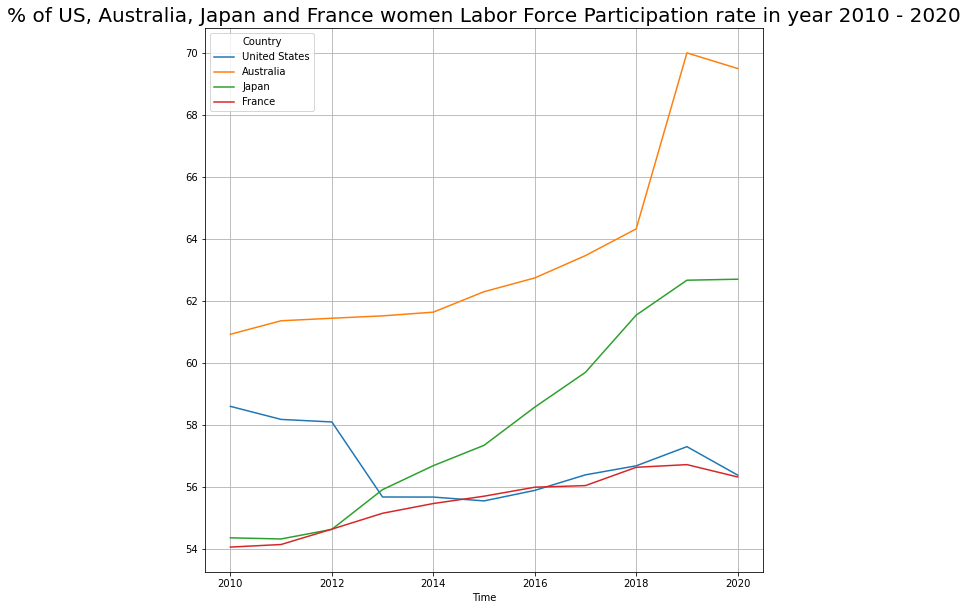

In [52]:

df2[['United States','Australia','Japan','France']].plot(figsize=(10,10)) 
#US as in North america, Austrilia as in Oceania, Japan as in Asia, Germany as in Europe for four main continents as examples
plt.grid()
plt.title('% of US, Australia, Japan and France women Labor Force Participation rate in year 2010 - 2020',fontsize=20)


### 4. Navigating the relationship between COVID and labor force participation rate
 - From the plots and tables below, we see that both women and men(in the All gender plot) experienced a decrease of labor force participation rate. Some are shown by a decreased rate of growth(that the rate was growthing but with a slower pace), and some are shown by a direct downward broken line.


In [53]:
df3=df[df['SEX']=='MW'] #we are looking at all gender's LFPR
df3= df3[df3['SERIES']=='LFPR']
column = 'Value'
df3 = pd.pivot_table(df3, values=column, index=["Time"], columns=["Country"])
df3


Country,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2010,67.265802,61.062909,53.510185,65.760504,56.710217,63.773323,58.603805,58.505740,68.296309,65.978109,...,55.002949,62.695320,56.713279,56.819872,59.228285,70.528748,65.371181,44.656958,63.585178,63.819748
2011,67.500045,61.273533,52.762003,65.863535,58.172110,64.497895,57.103323,58.554124,68.213276,66.188241,...,55.321004,62.341029,56.754272,55.869933,59.454777,70.530916,66.025777,45.783454,63.652701,63.455024
2012,67.422168,61.762613,52.983067,66.006578,58.332630,65.353363,61.080949,59.135092,67.812024,66.316675,...,55.796501,62.239639,57.229795,55.710462,59.719759,70.898365,66.234776,45.932193,64.085121,63.434972
2013,67.397468,62.090242,53.447813,66.268748,58.516510,65.135253,60.685615,59.938272,67.231879,66.298462,...,56.029599,61.724238,57.438891,55.776890,59.695459,71.379193,66.399665,46.688194,64.533744,60.939020
2014,67.333664,62.010031,53.610356,66.092766,58.796150,65.222663,60.360445,60.154300,67.304557,66.112242,...,56.575201,61.652214,57.684703,56.383324,59.644250,71.845070,66.912191,46.652337,64.653083,60.810876
2015,67.837477,62.149857,53.563758,66.283143,58.883200,65.683531,59.383507,60.455359,67.611577,67.325647,...,54.322425,61.825474,58.166606,56.465232,59.913295,71.914413,67.286364,47.585001,65.045910,60.775656
2016,67.914449,62.758008,53.549715,66.421569,58.980114,65.536185,56.884030,61.138008,68.145864,68.291494,...,54.718523,62.066277,58.789629,56.101670,59.940962,72.049680,67.861226,48.387106,65.115962,61.118147
2017,68.422375,62.903370,53.879088,66.808777,59.357482,65.363365,57.928059,61.702836,68.466076,69.406248,...,55.208457,62.933290,58.985717,58.334055,59.908294,72.575594,67.900609,49.304102,65.530556,61.431882
2018,69.078529,63.302230,54.402605,66.794886,59.475652,64.916012,59.873566,62.253218,68.801699,69.763814,...,55.454911,63.427338,59.103127,59.065388,59.945601,72.787429,68.102103,49.802767,65.667915,61.699445


Text(0.5, 1.0, '% of US, Australia, Japan and France All gender Labor Force Participation rate in year 2010 - 2020')

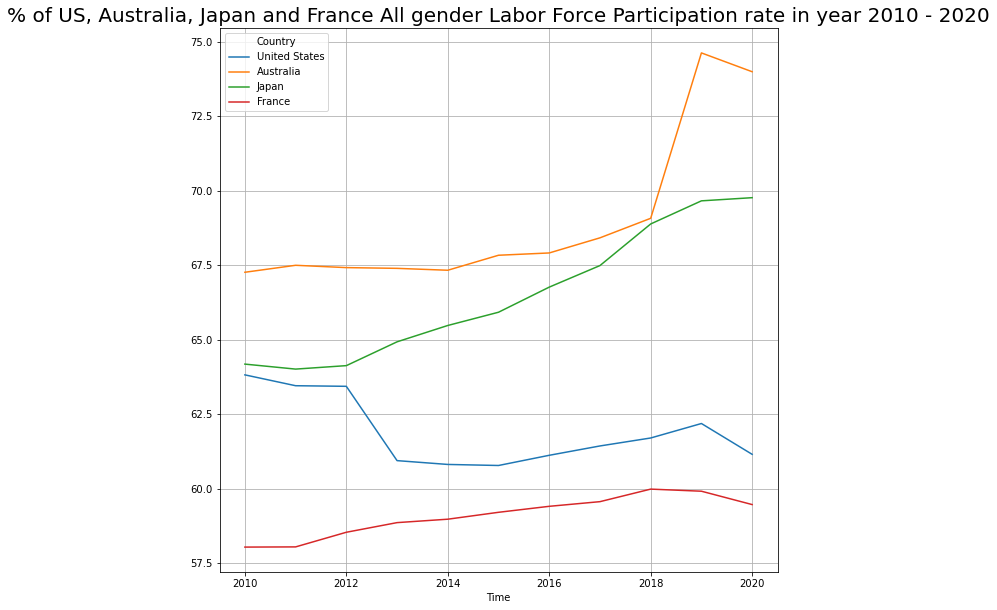

In [54]:
df3[['United States','Australia','Japan','France']].plot(figsize=(10,10)) 
#US as in North america, Austrilia as in Oceania, Japan as in Asia, Germany as in Europe for four main continents as examples
plt.grid()
plt.title('% of US, Australia, Japan and France All gender Labor Force Participation rate in year 2010 - 2020' ,fontsize=20)

### 5. Navigating growth rate of and general trend in the past 10 years
- First we'll creat an empty data frame by each country, and calculate each year's growth rate and fill them in.

In [55]:
countries = pd.unique(df["Country"])

DF = pd.DataFrame(columns = countries)  # create an empty dataframe by each country 
DF

,Australia,Austria,Belgium,Canada,Czech Republic,Denmark,Finland,France,Germany,Greece,...,United States,OECD countries,Israel,Chile,Slovenia,Estonia,Lithuania,Latvia,Colombia,Costa Rica


Then we'll calculate each year's growth rate of all countries.

In [ ]:
CountryDict = {}

def calculateGrowth(last, this):
    growth = (this-last)/last*100
    return str(round(growth))+"%"



In [57]:
for i in range(len(df)) :
    if(df.loc[i,'SEX'] == 'MW' and df.loc[i,'SERIES'] == 'LFPR'):
        if(df.loc[i, 'Time'] == 2010):
            print(i,"here")
        else:
            print(df.loc[i, 'Country'], df.loc[i,'Time'], df.loc[i,'Value'],i)
            num = calculateGrowth(df.loc[i-1,'Value'], df.loc[i,'Value'])

33 here
Australia 2011 55.3608672490948 34
Australia 2012 54.7056083542694 35
Australia 2013 53.7370758435047 36
Australia 2014 53.6534766376731 37
Australia 2015 53.6840346364558 38
Australia 2016 53.2111010777492 39
Australia 2017 53.1832792455401 40
Australia 2018 55.1463300051389 41
Australia 2019 54.7738603312315 42
Australia 2020 52.1846815168143 43
132 here
Austria 2011 42.5624792445474 133
Austria 2012 42.5271121955369 134
Austria 2013 40.829393860872 135
Austria 2014 39.7171982277888 136
Austria 2015 38.0425339977219 137
Austria 2016 37.8240317499595 138
Austria 2017 36.3659365698158 139
Austria 2018 37.1781210727269 140
Austria 2019 35.527586897855 141
Austria 2020 35.8905485389872 142
231 here
Belgium 2011 9.54625995795486 232
Belgium 2012 8.46196599654506 233
Belgium 2013 7.37180837797128 234
Belgium 2014 7.45883048713563 235
Belgium 2015 7.07580812754263 236
Belgium 2016 7.25809108813179 237
Belgium 2017 7.80248581661868 238
Belgium 2018 10.6588959968079 239
Belgium 2019 1

KeyError: 52765